src [here](https://towardsdatascience.com/sparksession-vs-sparkcontext-vs-sqlcontext-vs-hivecontext-741d50c9486a).

### 0. Spark Basic Architecture and Terminology

A `Spark application` consist of a `Driver Program` and a group of `Executors` on the cluster.

`Driver Program` is process that executes the main program of your `Spark application` and create `SparkContext` that coordinates the execution of job. 

`Executors` are processes running on the `worker nodes` of the cluster which are responsible for executing the `tasks`, the `Driver Program` has assigned to them.

The `cluster manager` (such as `Mesos` or `YARN`) is responsible for the allocation of physical resources to `Spark Applications`.



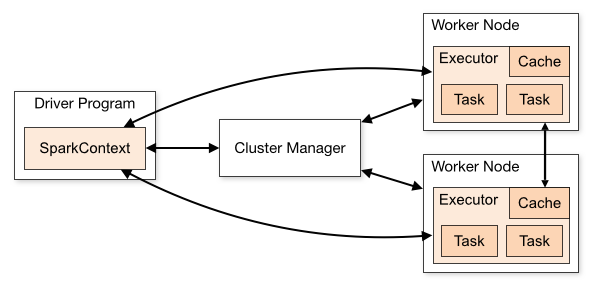

#### 0.1. Entry Points 

Every `Spark Application` needs an `entry point` that allows it to communicate with data sources and perform certain operations such as reading and writing data. In `Spark 1.x`, three entry points were introduced: `SparkContext`, `SQLContext` and `HiveContext`. Since `Spark 2.x`, a new `entry point` called `SparkSession` has been introduced that essentially combined all functionalities available in the three aforementioned contexts. 

Note that all contexts are still available even in newest Spark releases, mostly for backward compatibility purposes.

### 1. SparkContext

The `SparkContext` is used by the `Driver Process` of the Spark Application in order to establish a **communication with the cluster and the resource managers** in order to coordinate and execute jobs. 

`SparkContext` also enables the access to the other two contexts, namely `SQLContext` and `HiveContext` (more on these entry points later on).

In [1]:
from pyspark import SparkContext, SparkConf
conf = SparkConf() \
       .setAppName('app') \
       .setMaster('local')
sc = SparkContext(conf = conf)

22/05/08 00:01:03 WARN Utils: Your hostname, Nathans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.2 instead (on interface en0)
22/05/08 00:01:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/08 00:01:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 2. SQLContext

`SQLContext` is the entry point to `SparkSQL` which is a Spark module for structured data processing. Once `SQLContext` is initialised, the user can then use it in order to perform various “sql-like” operations over Datasets and Dataframes.

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
'''
conf = SparkConf() \
       .setAppName('app') \
       .setMaster('local')
sc = SparkContext(conf = conf)
'''
sql_context = SQLContext(sc)

/Users/nathanngo/miniconda3/envs/pyspark/lib/python3.8/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


### 3. HiveContext

If your Spark Application needs to communicate with `Hive` and you are using **Spark < 2.0** then you will probably need a `HiveContext` if . For Spark 1.5+, HiveContext also offers support for window functions.

For more understanding `Hive`, read [here](https://www.tutorialspoint.com/hive/hive_introduction.htm)

In [3]:
from pyspark import SparkContext, HiveContext
'''
conf = SparkConf() \
       .setAppName('app') \
       .setMaster('local')
sc = SparkContext(conf)
'''

hive_context = HiveContext(sc)

# run query by `sql` method
# hive_context.sql("select * from tableName limit 0")

/Users/nathanngo/miniconda3/envs/pyspark/lib/python3.8/site-packages/pyspark/sql/context.py:601: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  warnings.warn(


#### Note:
Since Spark 2.x+, tow additions made HiveContext redundant:
-  `SparkSession` was introduced that also offers `Hive` support.
-  Native window functions were released and essentially replaced the Hive UDAFs with native Spark SQL UDAFs.

### 4. SparkSession

Spark 2.0 introduced a new entry point called `SparkSession` that essentially replaced both `SQLContext` and `HiveContext`. 

Additionally, it gives to developers immediate access to `SparkContext`. In order to create a `SparkSession` with Hive support.

In [4]:
from pyspark.sql import SparkSession
spark_session = SparkSession \
                .builder \
                .enableHiveSupport() \
                .getOrCreate()

Two ways you can access spark context from spark session


In [7]:
spark_context = spark_session._sc
type(spark_context)

pyspark.context.SparkContext

In [8]:
spark_context = spark_session.sparkContext
type(spark_context)

pyspark.context.SparkContext